## Versão para teste de Árvore de Decisão

In [1]:
# Importar caminho
import pandas as pd
import os
import sys
# Adicionando o diretório-raiz do projeto ao sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.features.data_process import x_test, x_train, y_binary_test, y_binary_train

In [2]:
# Fazer o treinamento do modelo
from sklearn.tree import DecisionTreeClassifier

decision_tree_v1 = DecisionTreeClassifier()
decision_tree_v1.fit(x_train, y_binary_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [3]:
# Salvar modelo em models
import joblib

caminho_modelo = '../models/decision_tree_v1.pkl'
joblib.dump(decision_tree_v1, caminho_modelo)

print(f"Modelo salvo em: {caminho_modelo}")

Modelo salvo em: ../models/decision_tree_v1.pkl


In [4]:
# Fazer previsão
previsao = decision_tree_v1.predict(x_test)

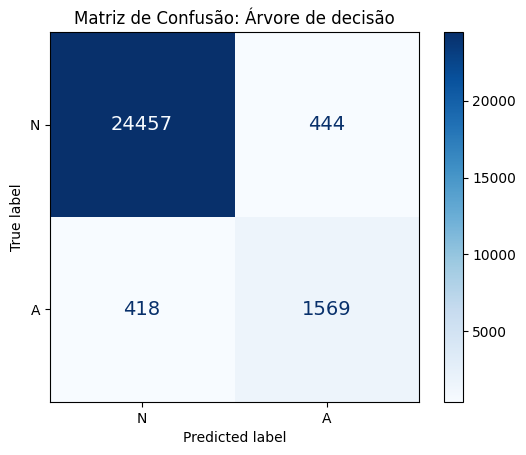

--- Métricas de Desempenho ---
Accuracy: 96.79%
Recall: 78.96%
ROC: 0.8859
F1-Score: 0.7845
Precision: 77.94%
Specificity: 98.22%
------------------------------


In [5]:
# Imprimir resultados
from src.models.evaluate_model import evaluate_model
evaluate_model(y_binary_test, previsao, "Matriz de Confusão: Árvore de decisão")

### Encontrar melhores parâmetros para a Árvore de Decisão

In [ ]:
# Encontrar os melhores parâmetros
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier()

param_grid = {
    'min_samples_split': [2, 4, 16, 64], # Nro min para que seja dividido
    'min_samples_leaf' : [1, 2, 4, 8], # Nro mín para ser folha
    'max_depth'        : [2, 8, 32], # Crescimento da árvore
    'criterion'        : ['gini', 'entropy']
}

# Fazer a chamada da função
grid = GridSearchCV(decision_tree, param_grid, cv=5, scoring='recall', n_jogbs = -1)

grid.fit(x_train, y_binary_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor sensibilidade:", grid.best_score_)

# Salve o melhor modelo encontrado pelo GridSearchCV
caminho_modelo = '../models/melhor_decision_tree_v1.pkl'
joblib.dump(grid.best_estimator_, caminho_modelo)

print(f"O melhor modelo foi salvo em: {caminho_modelo}")